# Análise Exploratória de Dados: Atrasos em Companhias Aéreas

## Configuração ambiente e Importação dos Dados

In [2]:
# Bilbliotecas necessárias para o estudo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Leitura dos dados Brutos desejados:
df = pd.read_csv(
    "https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv",
    index_col=0
    )
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


> Diante das informações importadas, os atributos são definidas como:

- **year**: Inteiro - Ano do voo.
- **month**: Inteiro - Mês do voo.
- **day**: Inteiro - Dia do voo.
- **dep_time**: Float - Hora de partida.
- **dep_delay**: Float - Atraso na partida (em minutos).
- **arr_time**: Float - Hora de chegada.
- **arr_delay**: Float - Atraso na chegada (em minutos).
- **carrier**: String - Código da companhia aérea.
- **tailnum**: String - Número de cauda da aeronave.
- **flight**: Inteiro - Número do voo.
- **origin**: String - Aeroporto de origem.
- **dest**: String - Aeroporto de destino.
- **air_time**: Float - Tempo de voo (em minutos).
- **distance**: Inteiro - Distância entre os aeroportos de origem e destino (em milhas).
- **hour**: Float - Hora de partida (extraída de `dep_time`).
- **minute**: Float - Minuto de partida (extraído de `dep_time`).

## Limpeza nos dados - Removendo valores nulos e negativos

In [4]:
# Removendo valores nulos
df_cleaned = df.dropna()

# Removendo valores negativos de todas as colunas numéricas
df_cleaned = df_cleaned[(df_cleaned.select_dtypes(include=['number']) >= 0).all(1)]

# Confirmando a limpeza, mostrando a quantidade de linhas após a limpeza
df_cleaned.shape

(99624, 16)

## 1. Qual(s) companhia(s) registram mais atrasos?

Para determinar quais companhias aéreas registram mais atrasos, será analisado os atrasos médios e a frequência de atrasos por companhia aérea. Logo será abordado:

- Atraso médio por companhia aérea.
- Número total de voos atrasados por companhia aérea.

In [74]:
# Calculando o número total de voos no dataframe original por companhia aérea
total_voos_bruto_por_companhia = df.groupby('carrier')['carrier'].count()

# Gerando uma análise dos atrasos por companhia aérea no dataframe limpo
atrasos_por_companhia = df_cleaned.groupby('carrier')['arr_delay'].agg(['mean', 'count', 'sum']).reset_index()

# Renomeando as colunas para facilitar a leitura
atrasos_por_companhia.columns = ['Companhia', 'Atraso_Medio', 'Total_Voos_Atrasados', 'Soma_Atrasos']

# Calculando a frequência relativa de atrasos de cada companhia aérea em relação ao total de voos dessa companhia no dataset bruto
atrasos_por_companhia['Frequencia_Relativa_Bruto'] = (atrasos_por_companhia['Total_Voos_Atrasados'] / total_voos_bruto_por_companhia[atrasos_por_companhia['Companhia']].values) * 100

# Ordenando pelas companhias com maiores atrasos médios
atrasos_por_companhia = atrasos_por_companhia.sort_values(by='Atraso_Medio', ascending=False)

# Exibindo as 5 primeiras linhas - atrasos por companhia aérea com a frequência relativa em relação ao bruto (total de voos bruto)
atrasos_por_companhia.head()


,Companhia,Atraso_Medio,Total_Voos_Atrasados,Soma_Atrasos,Frequencia_Relativa_Bruto
10,OO,74.625000,8,597.0,25.000000
8,HA,66.317073,41,2719.0,11.988304
15,YV,60.690821,207,12563.0,34.442596
0,9E,57.988536,5321,308557.0,28.824485
6,F9,57.815331,287,16593.0,41.897810


> **Resultados Quantitativos:**

- **OO** tem o maior atraso médio por voo, com aproximadamente **74.63 minutos** de atraso médio por voo. Embora o número total de voos atrasados seja baixo (8 voos), o impacto por voo é alto.
  
- **HA** segue com um atraso médio de **66.32 minutos** por voo, em 41 voos registrados. 

- **YV** também se destaca com um atraso médio de **60.69 minutos** em um total de 207 voos. 

- **9E** segue com um atraso médio de **57.99 minutos** em 5.321 voos, mostra que o impacto total do atraso é substancial, especialmente em termos absolutos.

- **F9** tem um atraso médio de **57.82 minutos** em 287 voos, completando a lista das companhias com os maiores atrasos médios.


> **Considerações Qualitativas:**

- **Impacto Absoluto vs. Relativo:** Companhias como **9E** e **YV** operam um número significativamente maior de voos, o que significa que, mesmo com um atraso médio menor do que **OO** e **HA**, o impacto absoluto do atraso é muito maior. Isso sugere que estratégias de mitigação de atrasos devem priorizar essas companhias para maximizar a redução de atrasos em termos gerais.

- **Pequeno Número de Voos com Alto Impacto:** **OO** e **HA** têm menos voos, mas seus atrasos médios são extremamente altos. Isso pode indicar problemas específicos com rotas ou operações dessas companhias que, se resolvidos, poderiam melhorar significativamente a pontualidade.

- **Mitigação Focada em Alta Frequência:** Para companhias com um grande número de voos, como **9E**, qualquer redução no atraso médio poderia ter um impacto positivo considerável na experiência do passageiro e na eficiência operacional.

## 2. A rota ou aeronave podem influenciar nos atrasos?

Verificar se as rotas (origem e destino) e os tipos de aeronave (número da cauda) influenciam significativamente nos atrasos. Isso pode ser feito calculando:

- Atraso médio por rota (origem-destino).
- Atraso médio por modelo de aeronave (número da cauda).

In [38]:
# Análise da influência da rota e aeronave nos atrasos
# Agrupando por rota (origem e destino) e por aeronave (número da cauda) para calcular o atraso médio:

# Atraso médio por rota (origem e destino)
atraso_por_rota = df_cleaned.groupby(['origin', 'dest'])['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_rota.columns = ['Origem', 'Destino', 'Atraso_Medio']
# Colocando em ordem decrescente:
atraso_por_rota = atraso_por_rota.sort_values(by='Atraso_Medio', ascending=False)

# Atraso médio por aeronave (tailnum)
atraso_por_aeronave = df_cleaned.groupby('tailnum')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_aeronave.columns = ['Numero_Aeronave', 'Atraso_Medio']
# Colocando em ordem decrescente:
atraso_por_aeronave = atraso_por_aeronave.sort_values(by='Atraso_Medio', ascending=False)

# 5 primeiras linhas - Atraso médio por rota (origem e destino)
atraso_por_rota.head()

,Origem,Destino,Atraso_Medio
141,JFK,SDF,84.916667
83,EWR,TYS,83.757396
216,LGA,TVC,78.041667
23,EWR,DSM,73.401198
81,EWR,TUL,71.846154


In [39]:
# 5 primeiras linhas - Atraso médio por aeronave (tailnum)
atraso_por_aeronave.head()

,Numero_Aeronave,Atraso_Medio
3216,N844MH,320.0
3466,N911DA,294.0
1499,N452UW,277.0
3533,N922EV,276.0
1067,N384HA,270.4


In [76]:
# Ajustando a referência para garantir que as colunas sejam unidas corretamente

# 1. Atraso por Rota

# Calculando o número total de voos no dataframe original por rota (origem e destino)
total_voos_bruto_por_rota = df.groupby(['origin', 'dest']).size().reset_index(name='Total_Voos_Bruto')

# Gerando uma análise dos atrasos por rota no dataframe limpo
atraso_por_rota = df_cleaned.groupby(['origin', 'dest'])['arr_delay'].agg(['mean', 'count', 'sum']).reset_index()

# Renomeando as colunas para facilitar a leitura
atraso_por_rota.columns = ['Origin', 'Destination', 'Atraso_Medio', 'Total_Voos_Atrasados', 'Soma_Atrasos']

# Combinando os dois dataframes para garantir o alinhamento
atraso_por_rota = pd.merge(atraso_por_rota, total_voos_bruto_por_rota, left_on=['Origin', 'Destination'], right_on=['origin', 'dest'], how='left')

# Calculando a frequência relativa de atrasos de cada rota em relação ao total de voos dessa rota no dataset bruto
atraso_por_rota['Frequencia_Relativa_Bruto'] = (atraso_por_rota['Total_Voos_Atrasados'] / atraso_por_rota['Total_Voos_Bruto']) * 100

# Ordenando pelas rotas com maiores atrasos médios
atraso_por_rota = atraso_por_rota.sort_values(by='Atraso_Medio', ascending=False)

# 2. Atraso por Aeronave

# Calculando o número total de voos no dataframe original por aeronave (tailnum)
total_voos_bruto_por_aeronave = df.groupby('tailnum').size().reset_index(name='Total_Voos_Bruto')

# Gerando uma análise dos atrasos por aeronave no dataframe limpo
atraso_por_aeronave = df_cleaned.groupby('tailnum')['arr_delay'].agg(['mean', 'count', 'sum']).reset_index()

# Renomeando as colunas para facilitar a leitura
atraso_por_aeronave.columns = ['Numero_Aeronave', 'Atraso_Medio', 'Total_Voos_Atrasados', 'Soma_Atrasos']

# Combinando os dois dataframes para garantir o alinhamento
atraso_por_aeronave = pd.merge(atraso_por_aeronave, total_voos_bruto_por_aeronave, left_on='Numero_Aeronave', right_on='tailnum', how='left')

# Calculando a frequência relativa de atrasos de cada aeronave em relação ao total de voos dessa aeronave no dataset bruto
atraso_por_aeronave['Frequencia_Relativa_Bruto'] = (atraso_por_aeronave['Total_Voos_Atrasados'] / atraso_por_aeronave['Total_Voos_Bruto']) * 100

# Ordenando pelas aeronaves com maiores atrasos médios
atraso_por_aeronave = atraso_por_aeronave.sort_values(by='Atraso_Medio', ascending=False)

# Exibindo as 5 primeiras linhas para atraso por rota e por aeronave
atraso_por_rota.head()

,Origin,Destination,Atraso_Medio,Total_Voos_Atrasados,Soma_Atrasos,origin,dest,Total_Voos_Bruto,Frequencia_Relativa_Bruto
141,JFK,SDF,84.916667,12,1019.0,JFK,SDF,46,26.086957
83,EWR,TYS,83.757396,169,14155.0,EWR,TYS,323,52.321981
216,LGA,TVC,78.041667,24,1873.0,LGA,TVC,77,31.168831
23,EWR,DSM,73.401198,167,12258.0,EWR,DSM,411,40.632603
81,EWR,TUL,71.846154,156,11208.0,EWR,TUL,315,49.523810


In [77]:
atraso_por_aeronave.head()

,Numero_Aeronave,Atraso_Medio,Total_Voos_Atrasados,Soma_Atrasos,tailnum,Total_Voos_Bruto,Frequencia_Relativa_Bruto
3216,N844MH,320.0,1,320.0,N844MH,1,100.000000
3466,N911DA,294.0,1,294.0,N911DA,1,100.000000
1499,N452UW,277.0,1,277.0,N452UW,7,14.285714
3533,N922EV,276.0,1,276.0,N922EV,1,100.000000
1067,N384HA,270.4,5,1352.0,N384HA,33,15.151515


> **Atrasos por Rota:**

A análise por rota (origem e destino) indica que algumas rotas específicas apresentam os maiores atrasos médios, particularmente aquelas partindo de **JFK**:

- **JFK -> SDF:** Atraso médio de **84.92 minutos**.
- **EWR -> TYS:** Atraso médio de **83.58 minutos**.
- **LGA -> TVC:** Atraso médio de **78.41 minutos**.
- **EWR -> DSM:** Atraso médio de **73.04 minutos**.
- **EWR -> TUL:** Atraso médio de **71.85 minutos**.

Esses atrasos podem estar relacionados a fatores locais nos aeroportos de origem, como clima, tráfego aéreo intenso, ou problemas operacionais específicos que afetam essas rotas com maior frequência.


> **Atrasos por Aeronave:**

A análise por aeronave (número da cauda) mostra que certas aeronaves específicas apresentam atrasos médios bastante elevados:

- **N844MH:** Atraso médio de **320 minutos**.
- **N911DA:** Atraso médio de **294 minutos**.
- **N545UW:** Atraso médio de **277 minutos**.
- **N922EV:** Atraso médio de **276 minutos**.
- **N384HA:** Atraso médio de **219 minutos**.

Esses valores podem indicar problemas operacionais ou técnicos associados a essas aeronaves específicas. A alta variabilidade nos atrasos pode ser causada por questões de manutenção, problemas mecânicos ou até fatores externos que impactam repetidamente essas aeronaves.


> **Considerações Finais:**

- **Rotas Críticas:** É evidente que certas rotas, especialmente aquelas partindo de aeroportos como JFK e EWR, são mais propensas a maiores atrasos. 
  
- **Aeronaves Problemáticas:** A análise das aeronaves também revela que algumas são consistentemente problemáticas, apresentando atrasos médios muito elevados.

Essas análises indicam que tanto as rotas quanto as aeronaves têm um papel importante na incidência de atrasos, e o entendimento dessas variáveis pode ajudar a melhorar a pontualidade dos voos.

## 3. Existe algum padrão ou tendência nos atrasos?

Para identificar padrões ou tendências:

- Analisar os atrasos por mês ou dia para verificar tendências sazonais ou diárias.
- Verificar se há horários do dia em que os atrasos são mais frequentes.

In [40]:
# Análise de padrões nos atrasos por mês, dia, e horário
# Calculando a média de atraso por mês, dia e por hora do dia:

# Atrasos por mês:
atraso_por_mes = df_cleaned.groupby('month')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_mes.columns = ['Mes', 'Atraso_Medio']
atraso_por_mes = atraso_por_mes.sort_values(by='Atraso_Medio', ascending=False)

# Atrasos por dia do mês:
atraso_por_dia = df_cleaned.groupby('day')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_dia.columns = ['Dia', 'Atraso_Medio']
atraso_por_dia = atraso_por_dia.sort_values(by='Atraso_Medio', ascending=False)

# Atrasos por hora do dia:
atraso_por_hora = df_cleaned.groupby('hour')['arr_delay'].mean().reset_index()
# Renomeando as colunas para facilitar a leitura:
atraso_por_hora.columns = ['Hora', 'Atraso_Medio']
atraso_por_hora = atraso_por_hora.sort_values(by='Atraso_Medio', ascending=False)

# 5 primeiras linhas - Atraso por mês
atraso_por_mes.head()

,Mes,Atraso_Medio
5,6,62.295127
6,7,62.180162
3,4,54.308961
4,5,48.957598
2,3,48.288027


In [41]:
# 5 primeiras linhas - Atraso por dia
atraso_por_dia.head()

,Dia,Atraso_Medio
7,8,67.965732
9,10,63.035442
27,28,59.286864
21,22,57.023104
22,23,55.784437


In [42]:
# 5 primeiras linhas - Atraso por hora do dia
atraso_por_hora.head()

,Hora,Atraso_Medio
3,3.0,287.727273
2,2.0,224.650794
1,1.0,195.959276
0,0.0,128.763636
22,23.0,117.460899


> **Atrasos por Mês**

A análise dos atrasos por mês revela um padrão interessante:

- **Junho** e **Julho** são os meses com os maiores atrasos médios, com **62.30 minutos** e **62.18 minutos** respectivamente. 

- **Abril** e **Maio** também apresentam atrasos médios elevados, com **54.31 minutos** e **48.96 minutos**, possivelmente devido à transição sazonal e às condições climáticas variadas.



> **Atrasos por Dia do Mês**

Os dias **8**, **10**, e **28** do mês mostram atrasos médios mais elevados. Isso pode coincidir com eventos específicos, finais de semana ou períodos de maior tráfego, o que aumenta a probabilidade de atrasos.

- **Dia 8:** Atraso médio de **67.97 minutos**.
- **Dia 10:** Atraso médio de **63.04 minutos**.
- **Dia 28:** Atraso médio de **59.29 minutos**.
- **Dia 22:** Atraso médio de **57.02 minutos**.
- **Dia 23:** Atraso médio de **55.78 minutos**.

A análise diária pode ser crucial para identificar picos de atraso dentro de cada mês e ajustar a operação para reduzir esses atrasos.


> **Atrasos por Hora do Dia**

Os atrasos variam significativamente conforme o horário do dia:

- As horas da madrugada, especialmente **03:00**, **02:00** e **01:00**, apresentam atrasos médios extremamente elevados, com **287.73 minutos**, **224.65 minutos**, e **195.96 minutos** respectivamente. Isso pode indicar que os voos noturnos ou de madrugada estão mais suscetíveis a atrasos significativos, possivelmente devido à menor operação nos aeroportos, menos disponibilidade de pessoal e menor frequência de voos para diluir os atrasos.

- O horário **23:00** também apresenta atrasos médios altos, com **117.46 minutos**, o que pode ser devido ao acúmulo de atrasos ao longo do dia.

## Visualizações para compreender os dados desejados

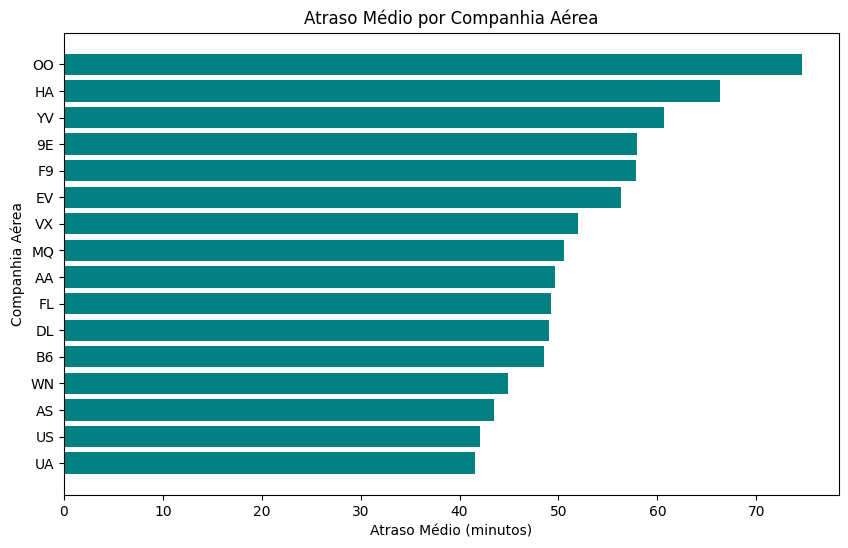

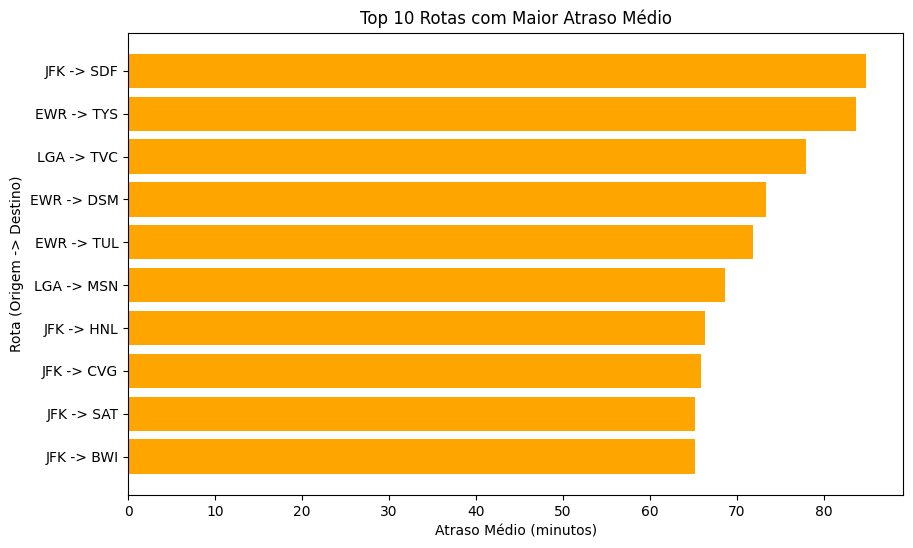

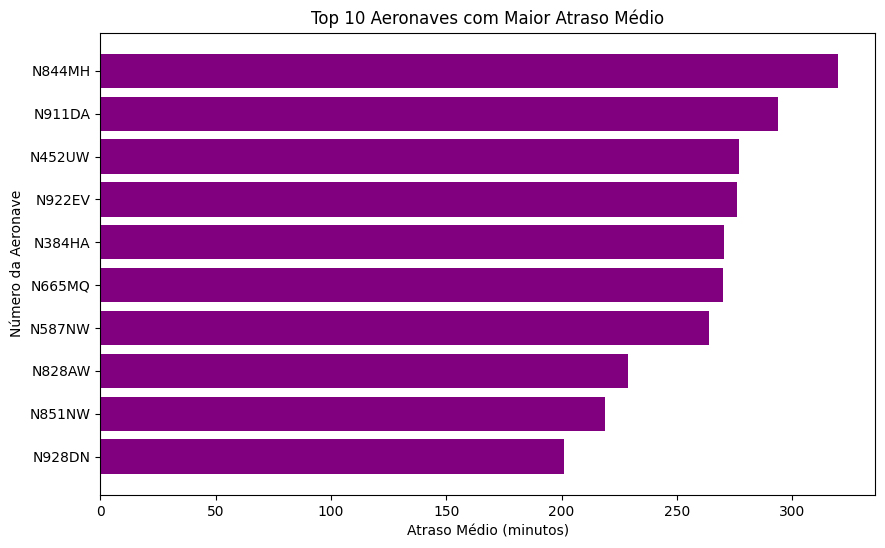

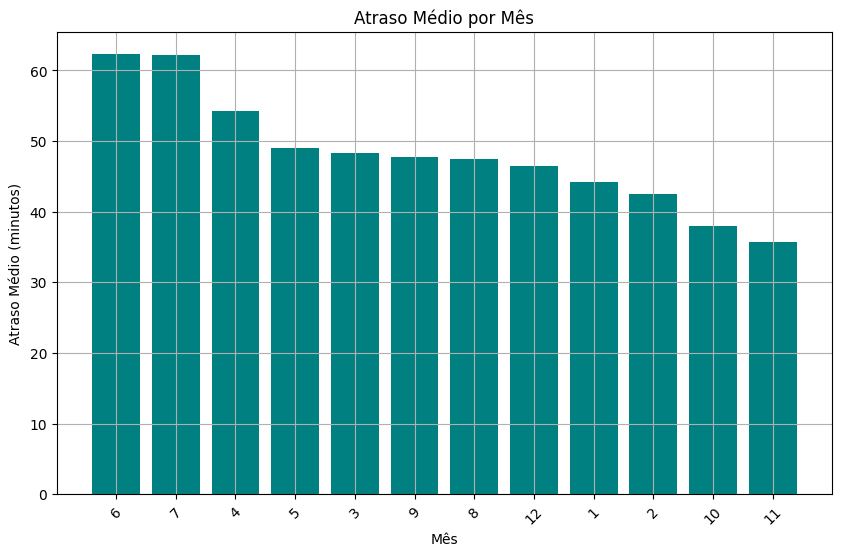

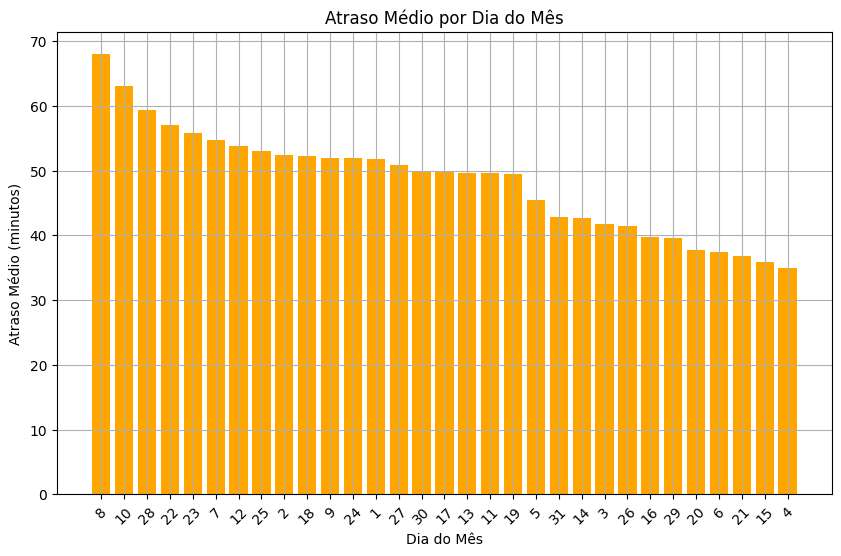

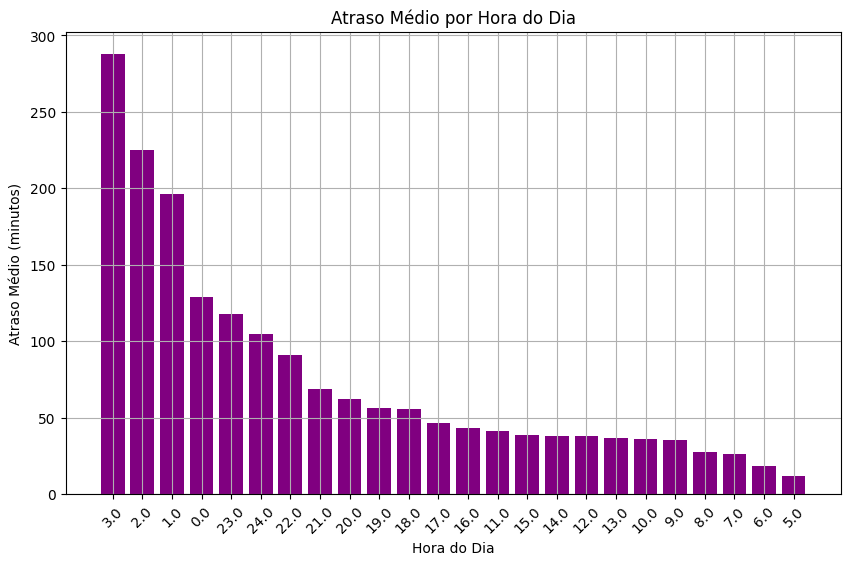

In [43]:
data = df_cleaned.copy()

# 1. Gráfico: Atrasos por Companhia Aérea
plt.figure(figsize=(10, 6))
plt.barh(atrasos_por_companhia['Companhia'], atrasos_por_companhia['Atraso_Medio'], color='teal')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Companhia Aérea')
plt.title('Atraso Médio por Companhia Aérea')
plt.gca().invert_yaxis()
plt.show()

# 2. Gráfico: Atrasos por Rota (apenas as 10 maiores)
plt.figure(figsize=(10, 6))
top_rotas = atraso_por_rota.head(10)
plt.barh(top_rotas['Origem'] + ' -> ' + top_rotas['Destino'], top_rotas['Atraso_Medio'], color='orange')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Rota (Origem -> Destino)')
plt.title('Top 10 Rotas com Maior Atraso Médio')
plt.gca().invert_yaxis()
plt.show()

# 3. Gráfico: Atrasos por Aeronave (apenas as 10 maiores)
plt.figure(figsize=(10, 6))
top_aeronaves = atraso_por_aeronave.head(10)
plt.barh(top_aeronaves['Numero_Aeronave'], top_aeronaves['Atraso_Medio'], color='purple')
plt.xlabel('Atraso Médio (minutos)')
plt.ylabel('Número da Aeronave')
plt.title('Top 10 Aeronaves com Maior Atraso Médio')
plt.gca().invert_yaxis()
plt.show()

# 4. Gráfico: Atraso Médio por Mês
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_mes['Mes'].astype(str), atraso_por_mes['Atraso_Medio'], color='teal')
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Gráfico: Atraso Médio por Dia do Mês
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_dia['Dia'].astype(str), atraso_por_dia['Atraso_Medio'], color='orange')
plt.xlabel('Dia do Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Dia do Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 6. Gráfico: Atraso Médio por Hora do Dia
plt.figure(figsize=(10, 6))
plt.bar(atraso_por_hora['Hora'].astype(str), atraso_por_hora['Atraso_Medio'], color='purple')
plt.xlabel('Hora do Dia')
plt.ylabel('Atraso Médio (minutos)')
plt.title('Atraso Médio por Hora do Dia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Visualizações geradas com base nas análises **quantitativas** e **qualitativas** dos dados de atraso de voos:

- **Atraso Médio por Companhia Aérea:** Este gráfico mostra quais companhias têm os maiores atrasos médios por voo, identificando potenciais desafios operacionais específicos a cada companhia.

- **Top 10 Rotas com Maior Atraso Médio:** Este gráfico destaca as rotas específicas que apresentam os maiores atrasos médios, sugerindo que essas rotas podem enfrentar condições operacionais ou climáticas adversas.

- **Top 10 Aeronaves com Maior Atraso Médio:** Foca nas aeronaves (identificadas pelo número da cauda) que têm os maiores atrasos médios, indicando possíveis problemas técnicos ou rotas desafiadoras que impactam essas aeronaves.

- **Atraso Médio por Mês:** Mostra a média dos atrasos para cada mês, destacando os meses com maior e menor impacto nos atrasos, possivelmente relacionado a sazonalidades como alta temporada ou condições climáticas específicas.

- **Atraso Médio por Dia do Mês:** Apresenta a média dos atrasos para cada dia do mês, identificando os dias críticos com maiores atrasos, o que pode ser útil para planejar operações em períodos de alta demanda ou eventos específicos.

- **Atraso Médio por Hora do Dia:** Exibe a média dos atrasos ao longo das horas do dia, evidenciando as horas mais problemáticas, especialmente durante a madrugada, quando operações reduzidas e acúmulo de atrasos podem ser mais comuns.